In [1]:
#Importing Libraries
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
#Encoding the target classes
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [8]:
# This cell updates result list for images with tumor
data = []
paths = []
result = []

for r, d, f in os.walk(r'C:/Users/ajays/machine learning/Deep Learning/Brain Tumor Detection/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [9]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:/Users/ajays/machine learning/Deep Learning/Brain Tumor Detection/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [10]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [11]:
result = np.array(result)
result = result.reshape(139,2)

In [12]:
#Splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [14]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 41.7245 - accuracy: 0.5315 - val_loss: 45.7355 - val_accuracy: 0.5714
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 15.3214 - accuracy: 0.6757 - val_loss: 9.7606 - val_accuracy: 0.7857
Epoch 3/30
3/3 [==============================] - 3s 987ms/step - loss: 4.2517 - accuracy: 0.7928 - val_loss: 28.9612 - val_accuracy: 0.5357
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 5.2409 - accuracy: 0.7838 - val_loss: 7.8644 - val_accuracy: 0.6071
Epoch 5/30
3/3 [==============================] - 3s 947ms/step - loss: 1.8899 - accuracy: 0.8739 - val_loss: 4.5703 - val_accuracy: 0.7857
Epoch 6/30
3/3 [==============================] - 3s 997ms/step - loss: 2.6406 - accuracy: 0.8108 - val_loss: 6.1329 - val_accuracy: 0.6429
Epoch 7/30
3/3 [==============================] - 3s 958ms/step - loss: 1.4958 - accuracy: 0.8829 - val_loss: 14.7411 - val_accuracy: 0.6429
Epoch 8/30
3/3 [========

# checking the model prediction

In [15]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.99995231628418% Confidence This Is No, Its not a tumor


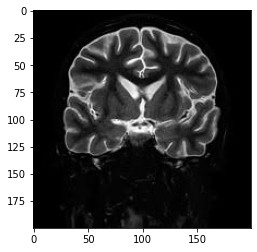

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:/Users/ajays/machine learning/Deep Learning/Brain Tumor Detection/brain_tumor_dataset/no/19 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


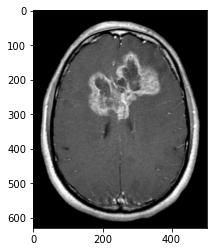

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:/Users/ajays/machine learning/Deep Learning/Brain Tumor Detection/brain_tumor_dataset/yes/Y25.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

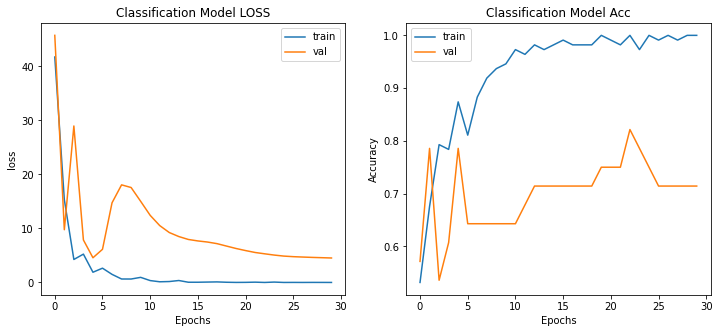

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title("Classification Model LOSS");
plt.ylabel("loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.title("Classification Model Acc");
plt.ylabel("Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);